In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
from skimage.transform import resize

SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [3]:
def preprocess_image(image):
    
    height, width, depth = image.shape
    result = np.zeros((image.shape[0]//2, image.shape[1]//2, 3))
    hr_image = result[:,:,:]
    smallimg = resize(image, (round(height/2), round(width/2), 3))
    hr_image = smallimg
    
#     hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
    hr_size = tf.convert_to_tensor(hr_image.shape[:-1])
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)

# def postprocess_image(img):
#     new_img = tf.clip_by_value(np.asarray(tf.squeeze(img)), 0, 255)
# #     new_img = Image.fromarray(tf.cast(new_img, tf.uint8).numpy())
#     return np.array(new_img)

In [4]:
maxi = 400
mini = 275

In [5]:
img = np.load("Landsat Subsets/039/goes2021240A039.npy")
img1 = 255*((img - mini) / (maxi - mini))
shape = img.shape
# img1 = np.zeros(shape)
# img2 = np.zeros(shape)
# img3 = np.zeros(shape)

# img1[10:20, 10:20] = 255
# img2[20:30, 20:30] = 255
# img3[30:40, 30:40] = 255

result = np.zeros((shape[0], shape[1], 3))
result[:,:,0]= img1
result[:,:,1]= img1
result[:,:,2]= img1

image = result

In [7]:
hr_image = preprocess_image(image)
model = hub.load(SAVED_MODEL_PATH)
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)

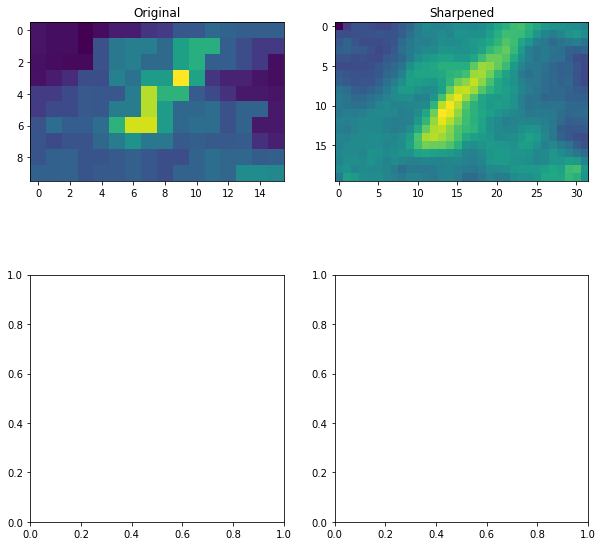

In [8]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40

lr = img
# hr = resize(np.array(fake_image)[:,:,0], lr.shape)
# hr = np.mean(fake_image, axis=2)
hr = (np.mean(fake_image, axis=2)/255)*(maxi - mini) + mini


x1 = 20
x2 = 30

ax1[0].set_title('Original')
ax1[1].set_title('Sharpened')

ax1[0].imshow(lr)
ax1[1].imshow(hr)
# ax2[0].imshow(lr[x1:x2, x1:x2])
# ax2[1].imshow(hr[x1:2*x2, x1:2*x2])

In [17]:
img = np.load("Landsat Subsets/103/goes2021240A103.npy")
img1 = 255*((img - mini) / (maxi - mini))
shape = img.shape

result = np.zeros((shape[0], shape[1], 3))
result[:,:,0]= img1
result[:,:,1]= img1
result[:,:,2]= img1

image = result

In [14]:
maxi = 400
mini = 275

In [18]:
hr_image = preprocess_image(image)
model = hub.load(SAVED_MODEL_PATH)
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)

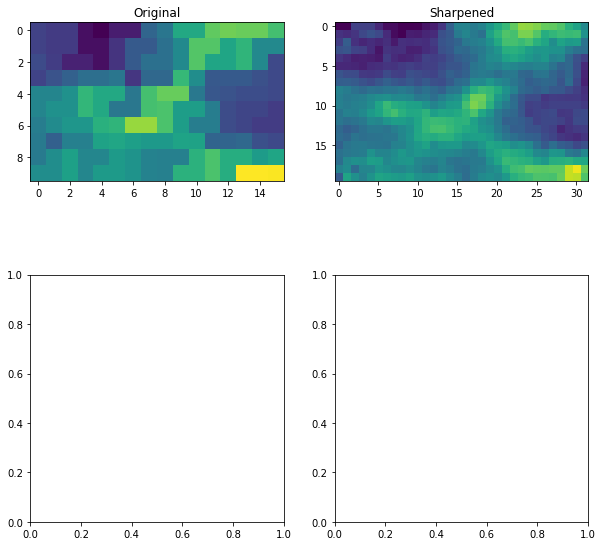

In [19]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))

fontsize = 40


lr = img
# hr = resize(np.array(fake_image)[:,:,0], lr.shape)
hr = (np.mean(fake_image, axis=2)/255)*(maxi - mini) + mini
# hr = (np.mean(fake_image, axis=2))

vmin = lr.min()
vmax = lr.max()

# hr = esrgan_sharpening_img(lr)

x1 = 20
x2 = 30

ax1[0].set_title('Original')
ax1[1].set_title('Sharpened')

ax1[0].imshow(lr, vmin=vmin, vmax=vmax)
ax1[1].imshow(hr, vmin=vmin, vmax=vmax)
# ax2[0].imshow(lr[x1:x2, x1:x2])
# ax2[1].imshow(hr[x1:2*x2, x1:2*x2])

## lr

In [40]:
hr

array([[290.90057, 296.15756, 298.25708, 298.21442, 298.20276, 297.37527,
        296.51187, 296.52542, 295.80176, 295.81406, 296.23666, 296.7318 ,
        297.04742, 297.8626 , 299.48   , 300.93207, 300.98282, 300.6223 ,
        300.98578, 301.85294, 302.70892, 303.36536, 304.28046, 305.2041 ,
        305.12677, 304.89645, 304.37762, 304.3033 , 303.97012, 302.9818 ,
        302.34055, 301.21823],
       [297.7505 , 297.52805, 297.81223, 298.47073, 298.85733, 298.52173,
        297.467  , 296.46817, 296.1982 , 297.05222, 296.98376, 297.31808,
        297.467  , 298.79498, 299.168  , 300.6031 , 301.05313, 300.59784,
        300.1799 , 302.30472, 303.1843 , 303.94168, 303.76276, 304.7577 ,
        304.77283, 304.06158, 302.86633, 303.2353 , 303.55237, 303.41812,
        303.55142, 301.6284 ],
       [298.1319 , 299.32242, 297.69073, 297.29922, 297.5689 , 297.29822,
        297.62387, 296.92065, 297.6351 , 297.5677 , 297.63217, 297.57443,
        298.04135, 298.95837, 299.2655 , 299.60568

In [35]:
plt.imshow(esrgan_sharpening_img(img))

NameError: name 'esrgan_sharpening_img' is not defined

In [75]:
lr

array([[298.27947998, 298.01605225, 298.01605225, 296.60171509,
        296.15631104, 297.01589966, 297.01589966, 299.67474365,
        300.36654663, 302.64547729, 302.64547729, 304.27264404,
        304.60675049, 304.46765137, 304.46765137, 303.68588257],
       [298.27947998, 298.01605225, 298.01605225, 296.60171509,
        296.60171509, 297.78149414, 299.21139526, 299.21139526,
        300.13635254, 301.2545166 , 304.02151489, 304.02151489,
        302.47601318, 303.20895386, 301.22598267, 301.22598267],
       [298.60061646, 298.10394287, 297.19302368, 297.19302368,
        296.60171509, 297.78149414, 299.21139526, 300.13635254,
        300.13635254, 301.2545166 , 304.02151489, 302.47601318,
        302.47601318, 303.20895386, 301.22598267, 298.51309204],
       [298.33792114, 298.92089844, 299.50119019, 300.07879639,
        300.07879639, 300.36654663, 297.84014893, 299.7902832 ,
        299.7902832 , 303.34936523, 301.45419312, 299.18237305,
        299.21139526, 299.21139526, 2

In [31]:
hr.max()

428.1452

In [64]:
from sharpening_functions import *

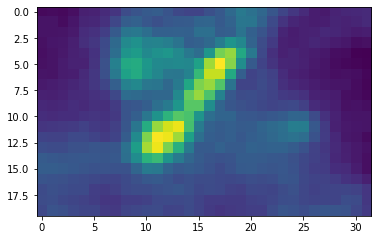

In [164]:
plt.imshow(x)